In [1]:
#import training dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv'
data = pd.read_csv(url)

#Display a random sample of 10 observation
features = data[data.columns[0:6]]
features.sample(10)
#data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
184,12.89,13.77,0.8541,5.495,3.026,6.185
155,11.19,13.05,0.8253,5.250,2.675,5.813
59,12.11,13.47,0.8392,5.159,3.032,1.502
5,14.38,14.21,0.8951,5.386,3.312,2.462
140,13.07,13.92,0.8480,5.472,2.994,5.304
0,15.26,14.84,0.8710,5.763,3.312,2.221
81,18.72,16.19,0.8977,6.006,3.857,5.324
159,11.49,13.22,0.8263,5.304,2.695,5.388
89,20.88,17.05,0.9031,6.450,4.032,5.016
102,19.46,16.50,0.8985,6.113,3.892,4.308


PRINCIPAL COMPONENT ANALYSIS (PCA) will translate the 6-D feature values to 2-D

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Normalize the numeric features so they are on the same scale and returns array also removing column header
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
#scaled_features

#Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]


array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

VIZUALIZE UNCLUSTERED TRANSLATED FROM 6-D TO 2-D DATAPOINTS

Text(0.5, 1.0, 'Data')

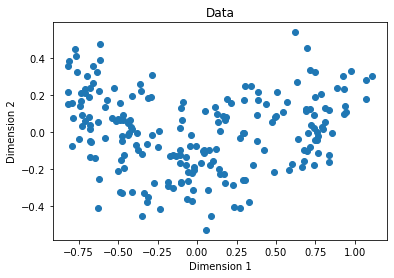

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#scatterpot of all rows of first column vs second column
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')



How do you know how many clusters to seperate your data into?

By using a metric that measures the tightness oF objects: Within Cluster Sum of Squares(WCSS). 

The lower values mean that the data points are closer

c:\Users\Iremide\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

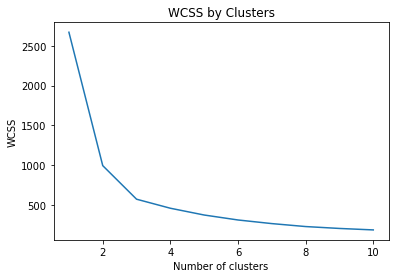

In [4]:
#import the libaries
import numpy as np
from sklearn.cluster import KMeans

#Create 10 models with 1-10 clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features.values)
    wcss.append(kmeans.inertia_)


#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')     


The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

BUILDING CLUSTERING MODELS for SEED DATASET

Load dataset, normalize numeric features and use PCA to convert to 2D

In [6]:
import pandas as pd

#load the training dataset
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv'
data = pd.read_csv(url)

#Display a random sample of 10 observations
#get the first 6 columns into features variable
features = data[data.columns[0:6]]
features.sample(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Normalize the numeric features so they are on the same scale and return array also removing column header
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

#Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

USING K-MEANS CLUSTERING ALGORITHM

In [7]:
from sklearn.cluster import KMeans

#create a model based on 3 centriods
model = KMeans(n_clusters =3, init ='k-means++', n_init=100, max_iter=1000)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)

# View the cluster assignments(somewhat like labels but are clusters)
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

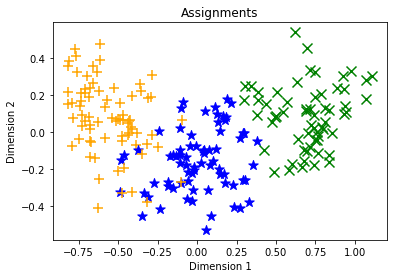

In [9]:
##VIZUALIZE THIS 2-D CLUSTERS

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

HIERARCHIAL CLUSTERING (AGGLOMERATIVE CLUSTERING)

It uses divisive method which finds partition in a bottom up stepwise manner.

In [10]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

VIZUALIZE THE 2-D CLUSTERING

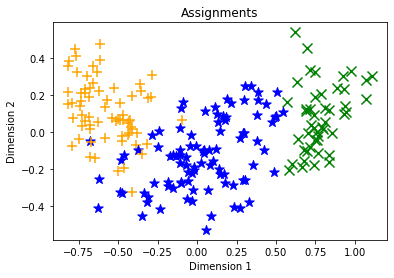

In [11]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)
